## Install the required packages

In [ ]:
!pip install --upgrade pip

!pip install numpy
!pip install pandas
!pip install openpyxl
!pip install ipykernel
!pip install tabulate
!pip install autopep8
!pip install radon
!pip install matplotlib
!pip install mycolorpy


## Import project modules

In [1]:
import sys
sys.path.append("./source/")
import matplotlib as mpl
import matplotlib.pyplot as plt
from random import random
from matplotlib import rcParams
import matplotlib.colors as mcolors
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from mycolorpy import colorlist as mcp
import pandas as pd
import numpy as np

rcParams['font.family'] = 'Sans'

from World import World
from Constants import Constants
from VaccineWarehouse import VaccineWarehouse
from Population import Population
from Config import VaccineApproach
from DataHandler import DataHandler
from COVIDsim import COVIDsim

## Initialize config

In [2]:
Constants.currentCfg = Constants.execConfig
dh = DataHandler(Constants.data_folder, Constants.output_folder)

## Initialize objects and Run the simulation

In [3]:
# Preference based World creation
warehouse = VaccineWarehouse()
population = Population()
population.generate_representative_population(Constants.currentCfg.population_size, warehouse.vaccine_list)

world = World(warehouse, population)

covid1 = COVIDsim()
covid1.simulate(world, VaccineApproach.PREFERENCE_BASED_VACCINE, 0, True, True)

# Random Vaccine World creation
warehouse2 = VaccineWarehouse()
population2 = Population()
population2.generate_representative_population(Constants.currentCfg.population_size, warehouse.vaccine_list)

world2 = World(warehouse2, population2)

covid2 = COVIDsim()
covid2.simulate(world2, VaccineApproach.RANDOM_VACCINE, 0, True, True)

## Check simulation complexity

Explanation:
- cc is the radon command to compute Cyclomatic Complexity
- a tells radon to calculate the average complexity at the end. Note that the average is computed among the shown blocks. If you want the total average, among all the blocks, regardless of what is being shown, you should use --total-average.
- nc tells radon to print only results with a complexity rank of C or worse. Other examples: -na (from A to F), or -nd (from D to F).
The letter in front of the line numbers represents the type of the block (F means function, M method and C class).


Source: 
 + https://pypi.org/project/radon/
 + https://radon.readthedocs.io/en/latest/commandline.html


In [4]:
!echo __________________ Raw metrics __________________
!radon raw source
!echo __________________ Cyclomatic Complexity __________________
!radon cc source -a -nc
!echo __________________ Maintainability Index __________________
!radon mi source

__________________ Raw metrics __________________
source\Config.py
    LOC: 57
    LLOC: 35
    SLOC: 20
    Comments: 3
    Single comments: 0
    Multi: 20
    Blank: 17
    - Comment Stats
        (C % L): 5%
        (C % S): 15%
        (C + M % L): 40%
source\Constants.py
    LOC: 64
    LLOC: 13
    SLOC: 54
    Comments: 1
    Single comments: 0
    Multi: 3
    Blank: 7
    - Comment Stats
        (C % L): 2%
        (C % S): 2%
        (C + M % L): 6%
source\COVIDsim.py
    LOC: 173
    LLOC: 92
    SLOC: 91
    Comments: 23
    Single comments: 23
    Multi: 26
    Blank: 33
    - Comment Stats
        (C % L): 13%
        (C % S): 25%
        (C + M % L): 28%
source\DataHandler.py
    LOC: 38
    LLOC: 14
    SLOC: 10
    Comments: 0
    Single comments: 0
    Multi: 19
    Blank: 9
    - Comment Stats
        (C % L): 0%
        (C % S): 0%
        (C + M % L): 50%
source\District.py
    LOC: 88
    LLOC: 49
    SLOC: 43
    Comments: 0
    Single comments: 0
    Multi: 26


## Log results

Preference World:
Average refusal for generated population: 0.25718728714449113
Total ammount of offers: 77811
Vacination ratio: 57799 out of 100000
57.799% vaccinated after 200 day.


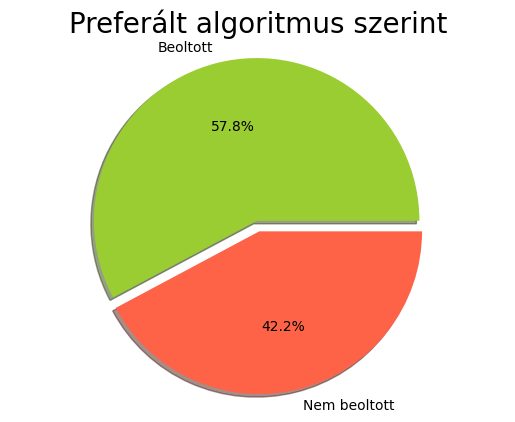

Random World:
Average refusal for generated population: 0.6208875286916603
Total ammount of offers: 196050
Vacination ratio: 74325 out of 100000
74.325% vaccinated after 200 day.


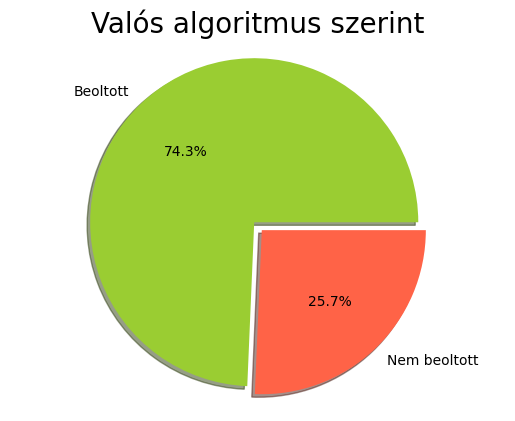

In [5]:
def logger(world: World, title):
    counter = 0
    full_offer_number = 0
    vaccinated = 0

    for p in world.population.people_list:
        counter += p.offered_counter - (1 if p.accepted else 0)
        full_offer_number += p.offered_counter
        if p.accepted:
            vaccinated += 1
            
    vac_per = vaccinated * 100.0 / len(world.population.people_list)
    print(f"Average refusal for generated population: {counter / full_offer_number}")
    print(f"Total ammount of offers: {full_offer_number}")
    print(f"Vacination ratio: {vaccinated} out of {len(world.population.people_list)}")
    print(f"{vac_per}% vaccinated after {Constants.currentCfg.execution_time} day.")
    
    labels = 'Beoltott', 'Nem beoltott'
    sizes = [vaccinated, len(world.population.people_list) - vaccinated]
    explode = (0.1, 0)
    colors = ['yellowgreen', 'tomato']

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%',
            shadow = True, startangle = 0, radius = 1.5)
    ax1.axis('equal')

    plt.title(title, fontsize = 20)
    plt.show()

print("Preference World:")
logger(world, 'Preferált algoritmus szerint')

print("Random World:")
logger(world2, 'Valós algoritmus szerint')

### Final vaccination ratio compared to vaccine types

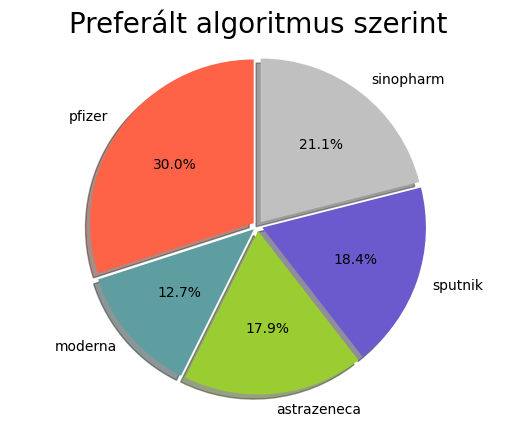

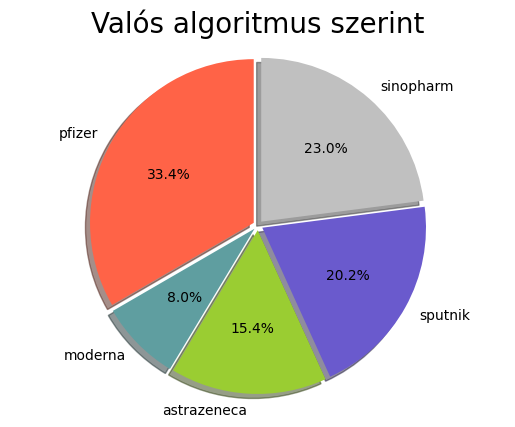

In [7]:
def print1(world: World, title):
    vaccine_name_list = [x.name for x in world.warehouse.vaccine_list]
    chosen_vaccine = [0] * len(vaccine_name_list)
    _chosen_vaccine = [0] * len(vaccine_name_list)
    vaccinated = 0

    for p in world.population.people_list:
        if p.accepted:
            vaccinated += 1
        for vi in range(len(vaccine_name_list)):
            if vaccine_name_list[vi] == p.selected_vaccine:
                chosen_vaccine[vi] += 1
                break
            
    for v in range(len(chosen_vaccine)):
        _chosen_vaccine[v] = chosen_vaccine[v] / vaccinated
    
    colors = ['tomato', 'cadetblue', 'yellowgreen', 'slateblue', 'silver']
    fig1, ax1 = plt.subplots()
    explode = (0.03, 0.03, 0.03, 0.03, 0.03)
    ax1.pie(_chosen_vaccine, explode = explode, labels = vaccine_name_list, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 90)
    ax1.axis('equal')

    plt.title(title, fontsize = 20)
    plt.show()

print1(world, 'Preferált algoritmus szerint') #pref
print1(world2, 'Valós algoritmus szerint') #rand

### Refusal ratio compared to vaccine types

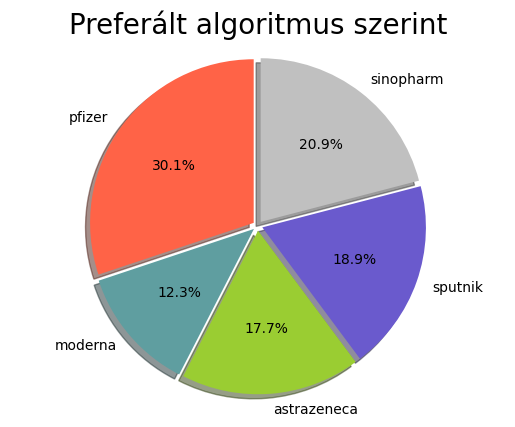

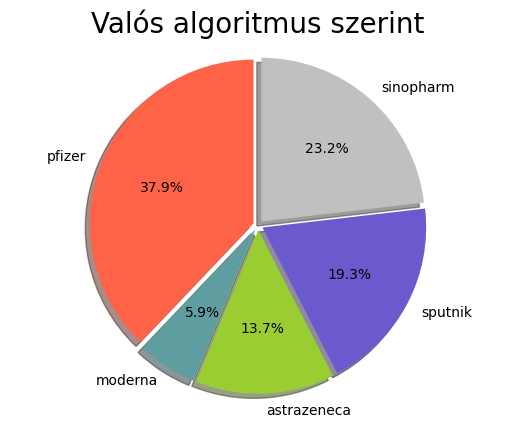

In [8]:
def print2(world: World, title):
    vaccine_name_list = [x.name for x in world.warehouse.vaccine_list]
    refused_vaccine = [0] * len(vaccine_name_list)
    _refused_vaccine = [0] * len(vaccine_name_list)
    ref_all = 0

    for dl in world.district_list:
        for vl in dl.vaccine_list:
            for vi in range(len(vaccine_name_list)):
                if vaccine_name_list[vi] == vl.name:
                    refused_vaccine[vi] += vl.refused_counter
                    break
    
    for p in refused_vaccine:
        ref_all += p
        
    for v in range(len(refused_vaccine)):
        _refused_vaccine[v] = refused_vaccine[v] / ref_all

    colors = ['tomato', 'cadetblue', 'yellowgreen', 'slateblue', 'silver']
    fig1, ax1 = plt.subplots()
    explode = (0.03, 0.03, 0.03, 0.03, 0.03)
    ax1.pie(_refused_vaccine, explode = explode, labels = vaccine_name_list, colors = colors, autopct = '%1.1f%%', shadow = True, startangle = 90)
    ax1.axis('equal')
    
    plt.title(title, fontsize = 20)
    plt.show()

print2(world, 'Preferált algoritmus szerint') #pref
print2(world2, 'Valós algoritmus szerint') #rand

### What did people who changed their mind accept at the end?

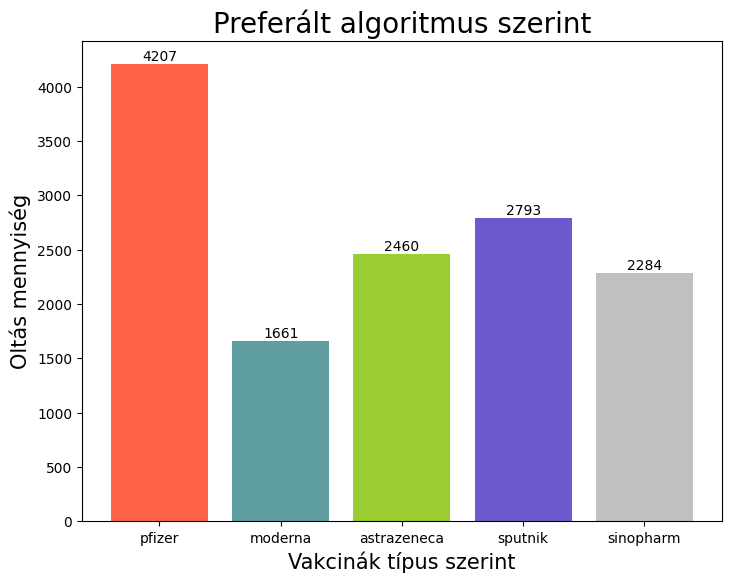

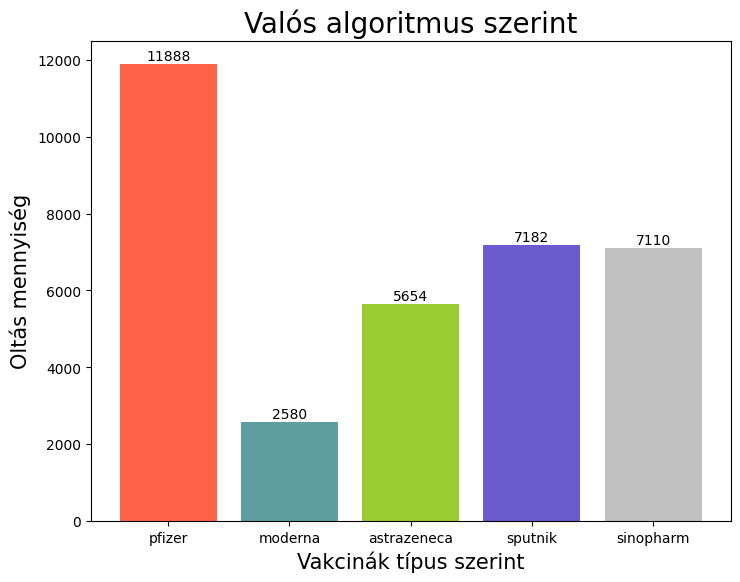

In [9]:
def print3(world: World, title):
    vaccine_name_list = [x.name for x in world.warehouse.vaccine_list]
    chosen_vaccine = [0] * len(vaccine_name_list)

    for p in world.population.people_list:
        for vi in range(len(vaccine_name_list)):
            if vaccine_name_list[vi] == p.selected_vaccine and p.offered_counter > 1:
                chosen_vaccine[vi] += 1
                break

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax_bar = ax.bar(vaccine_name_list, chosen_vaccine, color = ['tomato', 'cadetblue', 'yellowgreen', 'slateblue', 'silver'])
    ax.set_xlabel('Vakcinák típus szerint', fontsize = 15)
    ax.set_ylabel('Oltás mennyiség', fontsize = 15)

    temps = ax_bar
    labels = [f"{chosen_vaccine[i]}" for i in range(len(temps))]

    for temp, label in zip(temps, labels):
        height = temp.get_height()
        ax.text(
            temp.get_x() + temp.get_width() / 2, height + 5, label, ha = "center", va = "bottom"
        )

    plt.title(title, fontsize = 20)
    plt.show()

print3(world, 'Preferált algoritmus szerint') #ref
print3(world2, 'Valós algoritmus szerint') #rand

### How did the vaccination ratio changed depending on time?

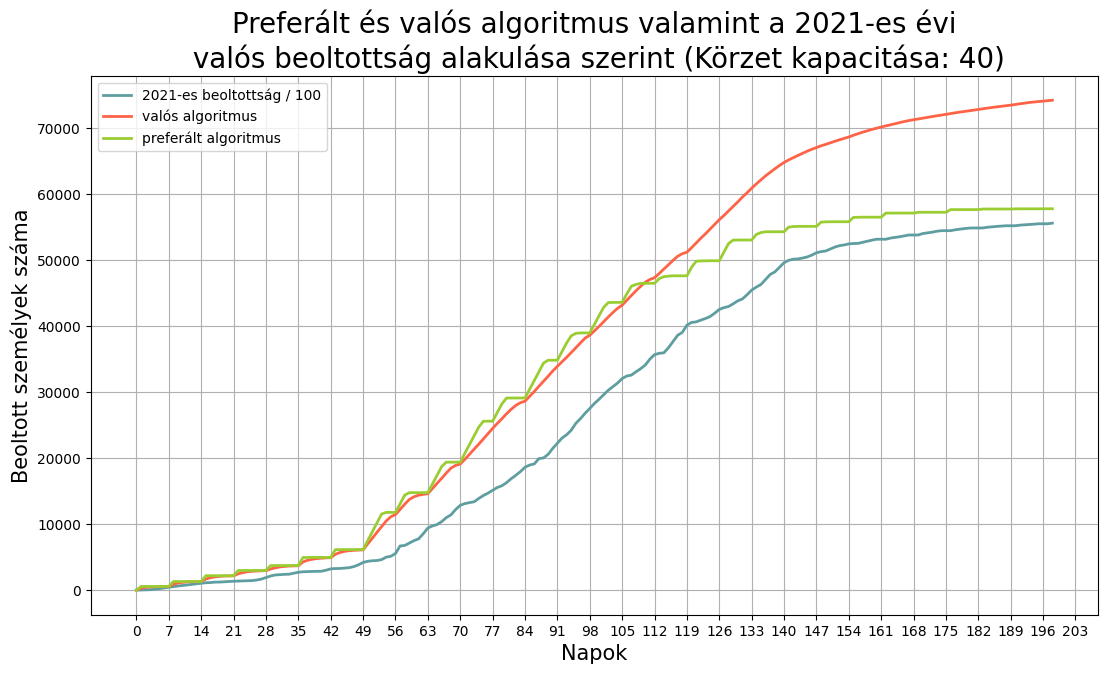

In [11]:
# Real, preference and random simulation vaccination ratio change compared to simulation.

vacc_num_list = []
vacc_num = 0
real_vaccinations = dh.from_xlsx(Constants.real_vacc)
last_date = datetime.strptime(Constants.currentCfg.shipment_start_date, "%Y-%m-%d")

for i in range(len(covid1.vaccination_progress)):
    currentDate = last_date + timedelta(days = 1)

    idx = real_vaccinations.index[pd.to_datetime(real_vaccinations["date"]) == currentDate].tolist()[0]

    vacc_num += real_vaccinations["first_vacc_num"].values[idx]
    vacc_num_list.append(vacc_num / Constants.currentCfg.vaccine_divider)
    last_date = currentDate

days = list(range(0, len(covid1.vaccination_progress)))
days1 = list(range(0, len(covid1.vaccination_progress)))
days2 = list(range(0, len(covid2.vaccination_progress)))

plt.figure(figsize=(13, 7))
plt.plot(days, vacc_num_list, color = "cadetblue", label = f'2021-es beoltottság / {Constants.currentCfg.vaccine_divider}', linewidth = 2)
plt.plot(days2, covid2.vaccination_progress, color = "tomato", label = 'valós algoritmus', linewidth = 2) 
plt.plot(days1, covid1.vaccination_progress, color = "yellowgreen", label = 'preferált algoritmus', linewidth = 2)
plt.xlabel('Napok', fontsize = 15)
plt.ylabel('Beoltott személyek száma', fontsize = 15)

plt.xticks(np.arange(0, Constants.currentCfg.execution_time + Constants.currentCfg.shipment_frequency, Constants.currentCfg.shipment_frequency))
plt.grid(True)
plt.title('Preferált és valós algoritmus valamint a 2021-es évi\n valós beoltottság alakulása szerint (Körzet kapacitása: 40)', fontsize = 20)
plt.legend()
plt.show()


### How did the vaccination ratio changed depending on time with multiple increasing district_capacity?

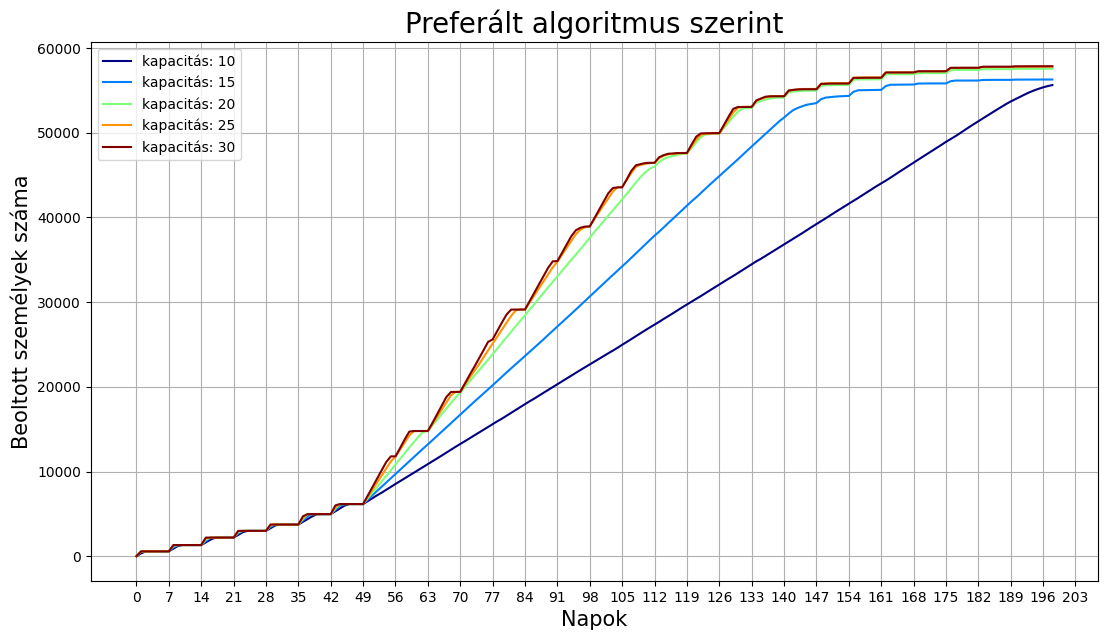

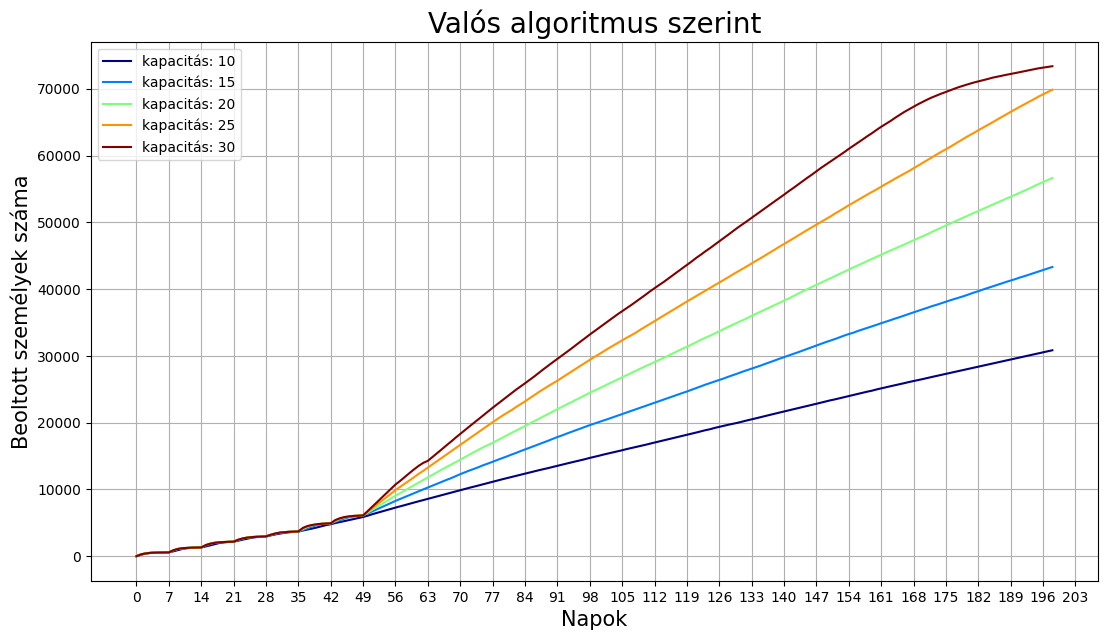

In [12]:
def district_increase_test3() -> COVIDsim:
    warehouse3 = VaccineWarehouse()
    population3 = Population()
    population3.generate_representative_population(Constants.currentCfg.population_size, warehouse.vaccine_list)

    world3 = World(warehouse3, population3)

    covid3 = COVIDsim()
    covid3.simulate(world3, VaccineApproach.PREFERENCE_BASED_VACCINE, 0, True)
    return covid3

def district_increase_test4() -> COVIDsim:
    warehouse4 = VaccineWarehouse()
    population4 = Population()
    population4.generate_representative_population(Constants.currentCfg.population_size, warehouse.vaccine_list)

    world4 = World(warehouse4, population4)

    covid4 = COVIDsim()
    covid4.simulate(world4, VaccineApproach.RANDOM_VACCINE, 0, True)
    return covid4

def print4(district_increase_test, title):
    days = list(range(0, len(covid1.vaccination_progress)))

    capacity_backup = Constants.currentCfg.district_capacity

    starting_capacity = 10
    Constants.currentCfg.district_capacity = starting_capacity

    colors = mcp.gen_color(cmap = "jet", n= 5)
    plt.figure(figsize=(13, 7))
    for i in range(5):
        temp_covid = district_increase_test()
        plt.plot(days, temp_covid.vaccination_progress, 
                color = (colors[i]), 
                label = f'kapacitás: {Constants.currentCfg.district_capacity}')
        Constants.currentCfg.district_capacity += int(starting_capacity/2)
        
    Constants.currentCfg.district_capacity = capacity_backup
    
    plt.xlabel('Napok', fontsize = 15)
    plt.ylabel('Beoltott személyek száma', fontsize = 15)

    plt.xticks(np.arange(0, Constants.currentCfg.execution_time + Constants.currentCfg.shipment_frequency, Constants.currentCfg.shipment_frequency))
    plt.grid(True)
    plt.title(title, fontsize = 20)
    plt.legend()
    plt.show()

print4(district_increase_test3, 'Preferált algoritmus szerint') #pref
print4(district_increase_test4, 'Valós algoritmus szerint') #rand

### Vaccine reduction over time

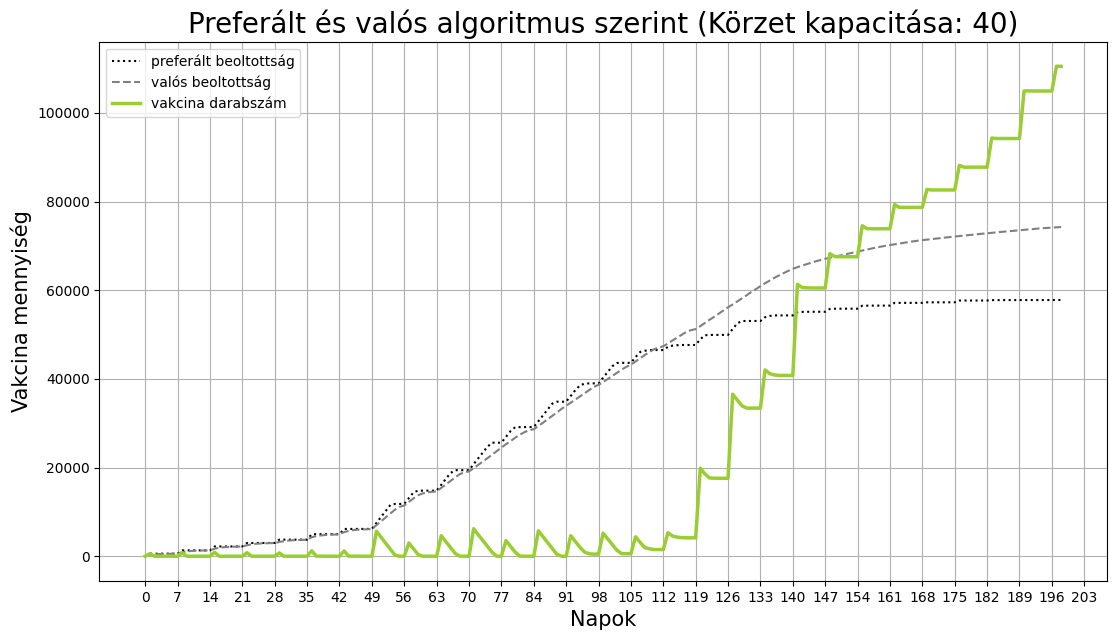

In [16]:
# this is the total amount of vaccines in the districts, the warehouse is not included

def print5(covid, color: str, title):
    days = list(range(0, len(covid.vaccination_progress)))
    days1 = list(range(0, len(covid1.vaccination_progress)))
    days2 = list(range(0, len(covid2.vaccination_progress)))

    plt.figure(figsize = (13, 7))
    plt.plot(days1, covid1.vaccination_progress, 'k:', label = 'preferált beoltottság')
    plt.plot(days2, covid2.vaccination_progress, '--', color = "grey", label = 'valós beoltottság') 
    plt.plot(days, covid.vaccine_amount, color = color, label = 'vakcina darabszám', linewidth = 2.5)
    plt.xlabel('Napok', fontsize = 15)
    plt.ylabel('Vakcina mennyiség', fontsize = 15)
    
    plt.xticks(np.arange(0, Constants.currentCfg.execution_time + Constants.currentCfg.shipment_frequency, Constants.currentCfg.shipment_frequency))
    plt.grid(True)
    plt.title(title, fontsize = 20)
    plt.legend()
    plt.show()
    
print5(covid1, "yellowgreen", 'Preferált és valós algoritmus szerint (Körzet kapacitása: 40)')

### Age distribution

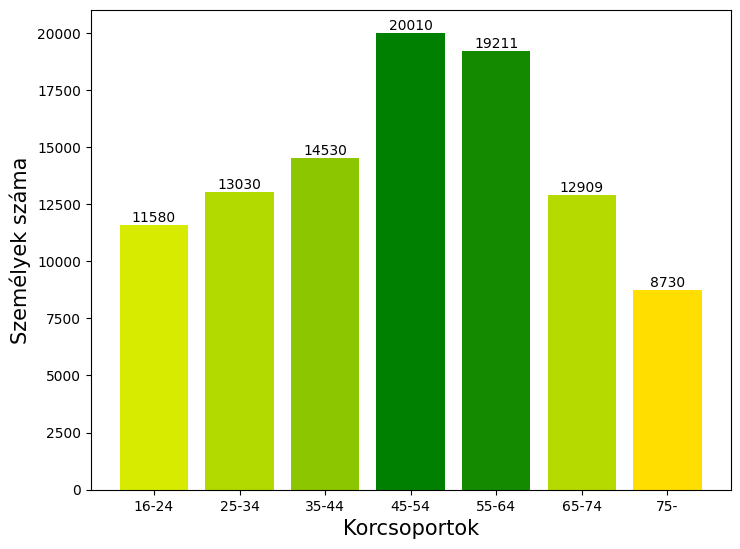

In [14]:
def print6(world: World):
    age_group = [x for x in world.population.representative_population["age_groups"]]
    chosen_age_group = [0] * len(age_group)

    for p in world.population.people_list:
        for a in range(len(age_group)):
            if p.age >= world.population.representative_population["min_age"].values[a] and p.age <= world.population.representative_population["max_age"].values[a]:
                chosen_age_group[a] += 1
                break
            
    cmap = mcolors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

    df = pd.DataFrame({"x" : chosen_age_group})
    
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax_bar = ax.bar(age_group, df["x"], color = cmap(df.x.values / df.x.values.max()))
    ax.set_xlabel('Korcsoportok', fontsize = 15)
    ax.set_ylabel('Személyek száma', fontsize = 15)

    temps = ax_bar
    labels = [f"{chosen_age_group[i]}" for i in range(len(temps))]

    for temp, label in zip(temps, labels):
        height = temp.get_height()
        ax.text(
            temp.get_x() + temp.get_width() / 2, height + 5, label, ha = "center", va = "bottom"
        )

    plt.show()

print6(world)

### The amount of vaccines offered/refused/accepted compared to vaccine types

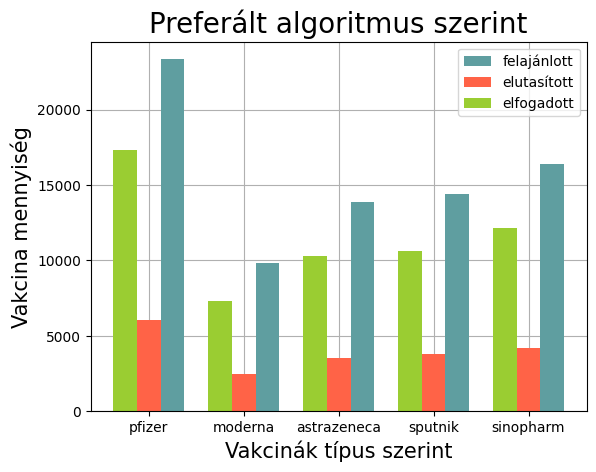

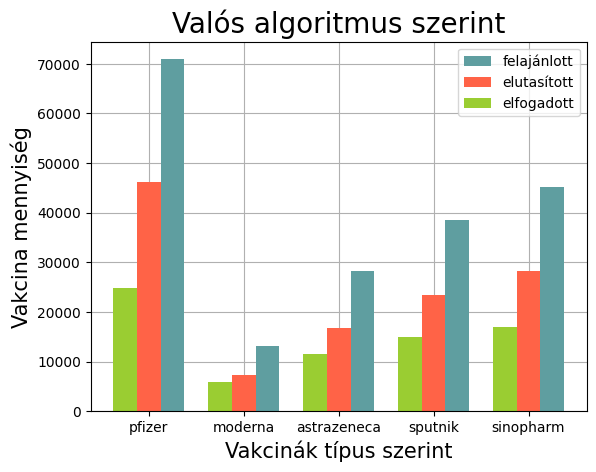

In [15]:
def print7(world: World, title):
    vaccine_name_list = [x.name for x in world.warehouse.vaccine_list]
    refused_vaccine = [0] * len(vaccine_name_list)
    chosen_vaccine = [0] * len(vaccine_name_list)
    offered_vaccine = [0] * len(vaccine_name_list)
    x = np.arange(len(vaccine_name_list))

    for p in world.population.people_list:
        for vi in range(len(vaccine_name_list)):
            if vaccine_name_list[vi] == p.selected_vaccine:
                chosen_vaccine[vi] += 1
                break

    for dl in world.district_list:
        for vl in dl.vaccine_list:
            for vi in range(len(vaccine_name_list)):
                if vaccine_name_list[vi] == vl.name:
                    refused_vaccine[vi] += vl.refused_counter
                    offered_vaccine[vi] += vl.offered_counter
                    break

    fig, ax = plt.subplots()
    
    ax_bar3 = ax.bar(x + 0.25, offered_vaccine, color = ['cadetblue'], width = 0.25, label = "felajánlott")
    ax_bar2 = ax.bar(x + 0, refused_vaccine, color = ['tomato'], width = 0.25, label = "elutasított")
    ax_bar1 = ax.bar(x - 0.25, chosen_vaccine, color = ['yellowgreen'], width = 0.25, label = "elfogadott")
    ax.set_xlabel('Vakcinák típus szerint', fontsize = 15)
    ax.set_ylabel('Vakcina mennyiség', fontsize = 15)
    
    plt.title(title, fontsize = 20)
    ax.set_xticks(x, vaccine_name_list)
    ax.legend()
    plt.grid(True)
    ax.set_axisbelow(True)
    plt.show()
    

print7(world, 'Preferált algoritmus szerint') #pref
print7(world2, 'Valós algoritmus szerint') #rand